In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lista_obj = []
lista_tempos = []
i = 'objetivos_GA 21 09 13 - 12 h 22 m.pkl'
ii = 'tempos_pandas 21 09 13 - 12 h 22 m.pkl'
with open(i, "rb") as infile:
    dados1 = pickle.load(infile)
    objetivos_pandas = pd.DataFrame(dados1)
    objetivos_pandas.iloc[20]
    objetivos_unstack = objetivos_pandas.iloc[20].unstack(level=-1)
    objetivos_unstack
    lista_obj.append(objetivos_unstack.transpose())


with open(ii, "rb") as infile:
    tempos1 = pickle.load(infile) 
    tempos_pandas = pd.Series(tempos1)
    tempos_unstack = tempos_pandas.unstack(level=-1)
    lista_tempos.append(tempos_unstack.transpose())      

In [3]:



objetivos_pandas = pd.concat(lista_obj)
tempos_pandas = pd.concat(lista_tempos)

In [4]:
conjuntos = [10,20,50,100,200,500,1000]
problemas = list(range(1,10))
lista_hs = [0.2,0.4,0.6,0.8]
lista_crossover = [0 , 1]
lista_elitismo = [0.35 , 0.75 , 1]
lista_so_filho_mutante = [0 , 1]
lista_taxa_mutacao = [0.2 , 1 , 5]

In [5]:
objetivos_pandas

10                                                                    \
      0.2                                                                   
        3                                                                   
      0.5                     1.0                     5.0                   
        0                       0                       0                   
     0.35    0.75    1.00    0.35    0.75    1.00    0.35    0.75    1.00   
0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0   
1  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0   
2  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0  1586.0   

           ...       1000                                              \
           ...        0.8                                               
        7  ...          3          7                                    
      0.5  ...        5.0        0.5                              1.0   
        0  ...          0          0                                0   
     0.35  ...       1.00       0.35       0.75       1.00       0.35   
0  2179.0  ...  5983303.0  6574297.0  6574297.0  6574297.0  6574297.0   
1  2179.0  ...  5983303.0  6574297.0  6574297.0  6574297.0  6574297.0   
2  2179.0  ...  5983303.0  6574298.0  6574297.0  6574297.0  6574297.0   

                                                          
                                                          
                                                          
                               5.0                        
                                 0                        
        0.75       1.00       0.35       0.75       1.00  
0  6574297.0  6574297.0  6574297.0  6574297.0  6574297.0  
1  6574297.0  6574297.0  6574297.0  6574297.0  6574297.0  
2  6574297.0  6574297.0  6574297.0  6574297.0  6574297.0  

[3 rows x 504 columns]

In [6]:
tempos_pandas

10                                                                \
        0.2                                                               
          3                                                               
        0.5                           1.0                           5.0   
          0                             0                             0   
       0.35      0.75      1.00      0.35      0.75      1.00      0.35   
0  8.087289  8.819545  7.959758  8.251042  8.646453  8.484449  9.036873   
1  8.147754  8.338057  7.986673  8.630420  8.661855  8.403635  8.945962   
2  7.766241  8.382555  8.027539  8.004869  8.985975  8.775541  8.981991   

                                 ...       1000                         \
                                 ...        0.8                          
                              7  ...          3           7              
                            0.5  ...        5.0         0.5              
                              0  ...          0           0              
       0.75      1.00      0.35  ...       1.00        0.35       0.75   
0  9.377928  9.193418  8.129876  ...  94.829272  109.608991  97.400646   
1  9.425799  9.288202  8.153721  ...  93.329752  111.897738  98.456557   
2  9.375970  9.185478  7.883921  ...  92.470090  111.014138  99.661597   

                                                                         \
                                                                          
                                                                          
                     1.0                                5.0               
                       0                                  0               
        1.00        0.35        0.75       1.00        0.35        0.75   
0  87.405366  111.240393  100.665841  92.870295  109.320842  103.990991   
1  86.363160  108.515037  100.055622  92.545840  110.295202  103.944174   
2  87.036361  108.074039  100.430517  91.199651  109.189238  104.130620   

              
              
              
              
              
        1.00  
0  98.895737  
1  93.789985  
2  93.292782  

[3 rows x 504 columns]

In [7]:
taxa_elitismo = 0.75
usa_coliseu = 0
taxa_mutacao = 1
    
    
    


In [8]:
objetivos_medios = objetivos_pandas.mean()
taxa_elitismo = -1
tipo_crossover = -2
taxa_mutacao = -3


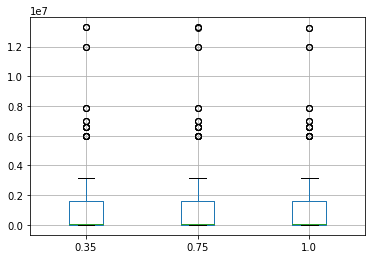

In [9]:
objetivos_medios.unstack(level=taxa_elitismo).boxplot()

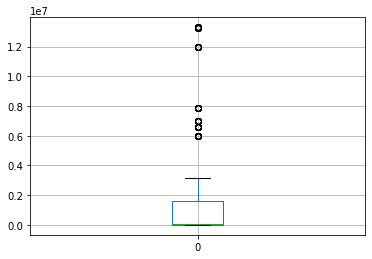

In [10]:
objetivos_medios.unstack(level=tipo_crossover).boxplot()

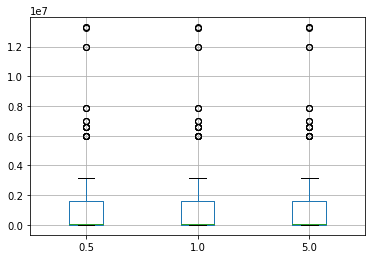

In [11]:
objetivos_medios.unstack(level=taxa_mutacao).boxplot()

In [12]:
objetivos_medios.unstack(level=taxa_mutacao)

0.5        1.0        5.0
10   0.2 3 0 0.35  1.586000e+03     1586.0     1586.0
             0.75  1.586000e+03     1586.0     1586.0
             1.00  1.586000e+03     1586.0     1586.0
         7 0 0.35  2.179000e+03     2179.0     2179.0
             0.75  2.179000e+03     2179.0     2179.0
...                         ...        ...        ...
1000 0.8 3 0 0.75  5.983304e+06  5983304.0  5983303.0
             1.00  5.983303e+06  5983303.0  5983303.0
         7 0 0.35  6.574297e+06  6574297.0  6574297.0
             0.75  6.574297e+06  6574297.0  6574297.0
             1.00  6.574297e+06  6574297.0  6574297.0

[168 rows x 3 columns]

In [13]:
tempos_medios = tempos_pandas.mean()

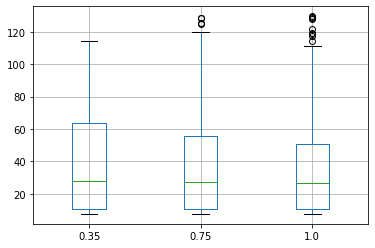

In [14]:
tempos_medios.unstack(level=taxa_elitismo).boxplot()

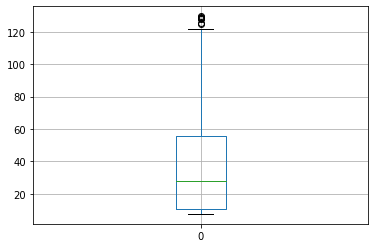

In [15]:
tempos_medios.unstack(level=tipo_crossover).boxplot()

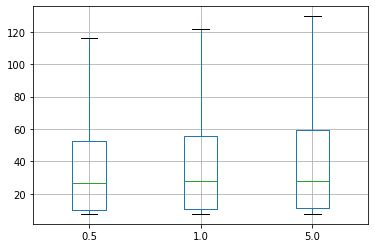

In [16]:
tempos_medios.unstack(level=taxa_mutacao).boxplot()

In [17]:
objs_por_h = objetivos_medios.unstack(level=-5)
tempos_por_h = tempos_medios.unstack(level=-5)

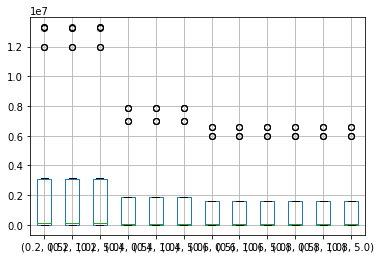

In [18]:
objs_por_h.unstack(level=taxa_mutacao).boxplot()

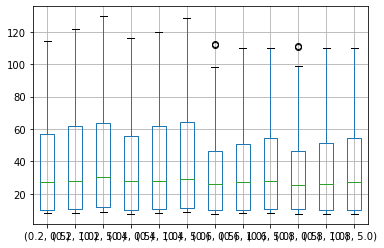

In [19]:
tempos_por_h.unstack(level=taxa_mutacao).boxplot()

In [20]:
tempos_h02 = tempos_por_h.transpose().iloc[0]
tempos_h04 = tempos_por_h.transpose().iloc[1]
tempos_h06 = tempos_por_h.transpose().iloc[2]
tempos_h08 = tempos_por_h.transpose().iloc[3]
objs_h02 = objs_por_h.transpose().iloc[0]
objs_h04 = objs_por_h.transpose().iloc[1]
objs_h06 = objs_por_h.transpose().iloc[2]
objs_h08 = objs_por_h.transpose().iloc[3]

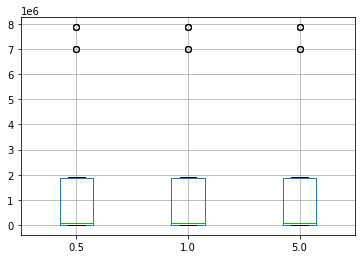

In [21]:
objs_h04.unstack(level=taxa_mutacao).boxplot()

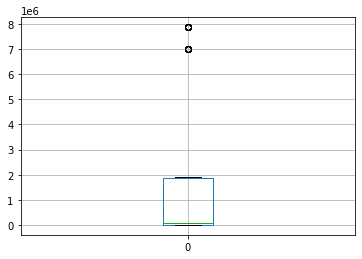

In [22]:
objs_h04.unstack(level=tipo_crossover).boxplot()

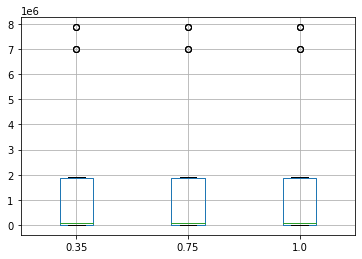

In [23]:
objs_h04.unstack(level=taxa_elitismo).boxplot()

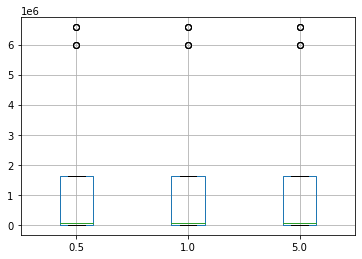

In [24]:
objs_h06.unstack(level=taxa_mutacao).boxplot()

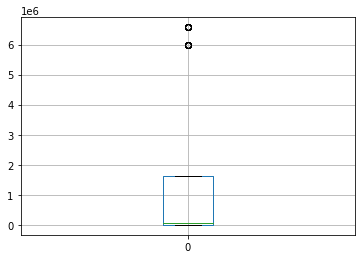

In [25]:
objs_h06.unstack(level=tipo_crossover).boxplot()

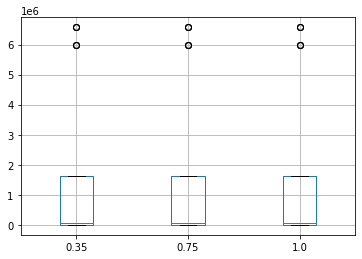

In [26]:
objs_h06.unstack(level=taxa_elitismo).boxplot()

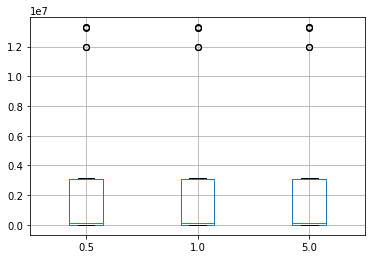

In [27]:
objs_h02.unstack(level=taxa_mutacao).boxplot()

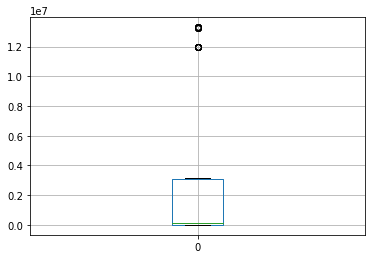

In [28]:
objs_h02.unstack(level=tipo_crossover).boxplot()

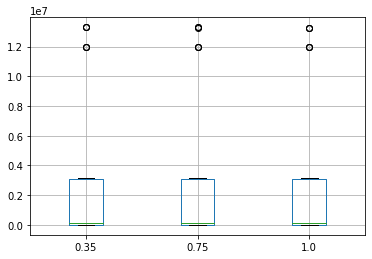

In [29]:
objs_h02.unstack(level=taxa_elitismo).boxplot()

Text(0.5, 0, 'taxa_mutacao')

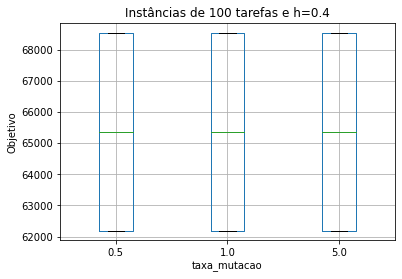

In [68]:
taxa_elitismo = -1
tipo_crossover = -2
taxa_mutacao = -3
informacao = {-1:"taxa_elitismo", -2: 'tipo_crossover',-3:'taxa_mutacao'}
i=-3
tamanho = 100

ax = objs_h06[(tamanho)].unstack(level=i).boxplot()

ax.set_ylabel('Objetivo')
ax.set_title('Instâncias de {} tarefas e h=0.4'.format(tamanho))
ax.set_xlabel(informacao[i])

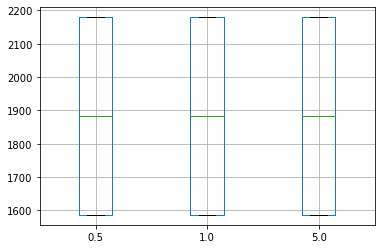

In [51]:
objs_h02[(10)].unstack(level=taxa_mutacao).boxplot()

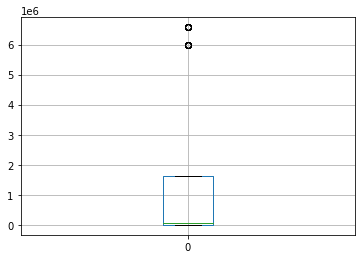

In [32]:
objs_h08.unstack(level=tipo_crossover).boxplot()

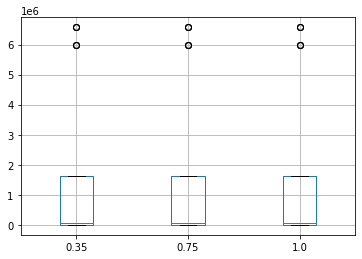

In [33]:
objs_h08.unstack(level=taxa_elitismo).boxplot()

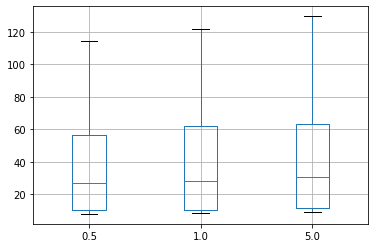

In [34]:
tempos_h02.unstack(level=taxa_mutacao).boxplot()


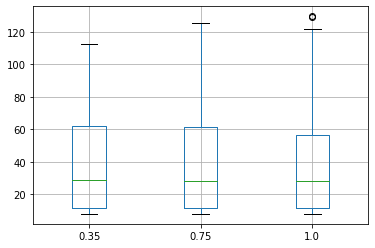

In [35]:
tempos_h02.unstack(level=taxa_elitismo).boxplot()


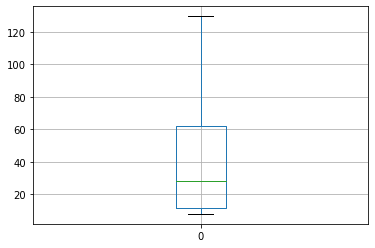

In [36]:
tempos_h02.unstack(level=tipo_crossover).boxplot()

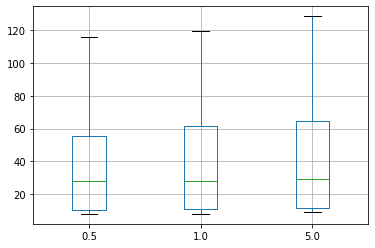

In [37]:
tempos_h04.unstack(level=taxa_mutacao).boxplot()


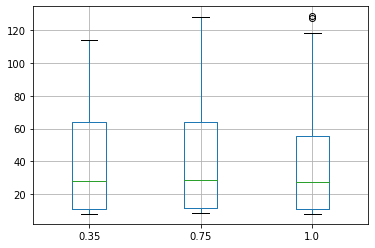

In [38]:
tempos_h04.unstack(level=taxa_elitismo).boxplot()


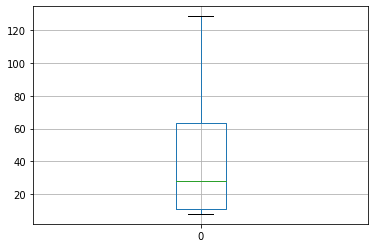

In [39]:
tempos_h04.unstack(level=tipo_crossover).boxplot()

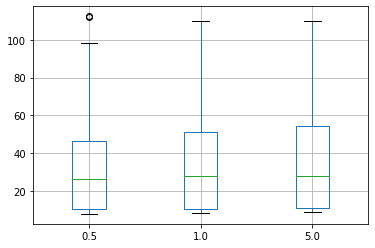

In [40]:
tempos_h06.unstack(level=taxa_mutacao).boxplot()


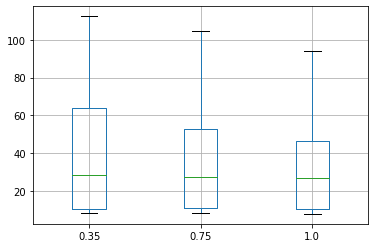

In [41]:
tempos_h06.unstack(level=taxa_elitismo).boxplot()


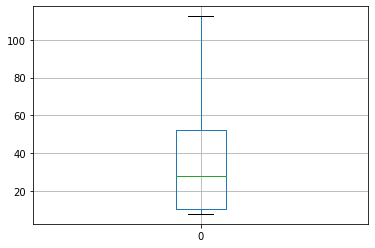

In [42]:
tempos_h06.unstack(level=tipo_crossover).boxplot()

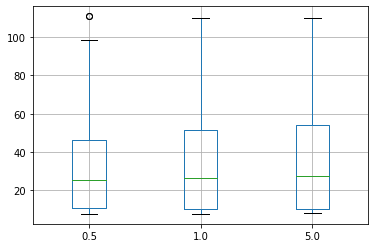

In [43]:
tempos_h08.unstack(level=taxa_mutacao).boxplot()


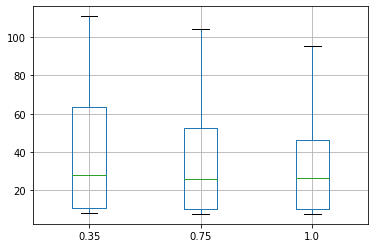

In [44]:
tempos_h08.unstack(level=taxa_elitismo).boxplot()


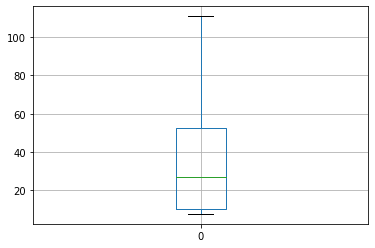

In [45]:
tempos_h08.unstack(level=tipo_crossover).boxplot()

In [46]:
objs_h08

10    3  0.5  0  0.35        793.0
                 0.75        793.0
                 1.00        793.0
         1.0  0  0.35        793.0
                 0.75        793.0
                           ...    
1000  7  1.0  0  0.75    6574297.0
                 1.00    6574297.0
         5.0  0  0.35    6574297.0
                 0.75    6574297.0
                 1.00    6574297.0
Name: 0.8, Length: 126, dtype: float64